In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload=files.upload()

Saving Datos Ejercicio 1_2.xlsx to Datos Ejercicio 1_2.xlsx


In [3]:
Datos=pd.read_excel('Datos Ejercicio 1_2.xlsx',skiprows=0,names=["IDcompras","Usuario","Edad","Genero","ID","NombreArticulo","Precio"])
Datos

,IDcompras,Usuario,Edad,Genero,ID,NombreArticulo,Precio
0,0,Lisim78,20.0,Male,108.0,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40.0,Male,143.0,Frenzied Scimitar,1.56
2,2,Ithergue48,24.0,Male,92.0,Final Critic,4.88
3,3,Chamassasya86,24.0,Male,100.0,Blindscythe,3.27
4,4,Iskosia90,23.0,Male,131.0,Fury,1.44
...,...,...,...,...,...,...,...
775,775,Aethedru70,21.0,Female,60.0,Wolf,3.54
776,776,Iral74,21.0,Male,164.0,Exiled Doomblade,1.63
777,777,Yathecal72,20.0,Male,67.0,"Celeste, Incarnation of the Corrupted",3.46
778,778,Sisur91,7.0,Male,101.0,Final Critic,4.19


In [4]:
# 2.1 RECUENTO DE JUGADORES
len(Datos["Usuario"].unique()) #unique quita los duplicados  

576

In [5]:
# 2.1 ANALISIS DE COMPRA
#2.1.1 NÚMERO DE ARTICULOS UNICOS
len(Datos["ID"].unique()) 

183

In [6]:
#2.1.2 PRECIO MEDIO DE COMPRAS
np.mean(Datos["Precio"])

3.050987179487176

In [7]:
#2.1.3 NUMERO TOTAL DE COMPRAS
len(Datos)

780

In [8]:
#2.1.4 INGRESOS TOTALES
Datos["Precio"].sum()

2379.77

In [9]:
#3 DATOS DEMOGRAFICOS POR GENERO
#3.1 PORCENTAGE Y NÚMERO DE JUGADORES MASCULINOS
COMPRAS_HOMBRE=Datos[Datos["Genero"]=="Male"] ## DATAFAME SOLO HOMBRES
H=len(COMPRAS_HOMBRE["Usuario"].unique()) #TOTAL HOMBRES
Porcentaje_H=(H/len(Datos["Usuario"].unique()))*100
round(Porcentaje_H,2)
print('Existen',H,'compradores hombre lo que equivale a un',round(Porcentaje_H,2),'% del total de compradores')

Existen 484 compradores hombre lo que equivale a un 84.03 % del total de compradores


In [10]:
#3 DATOS DEMOGRAFICOS POR GENERO
#3.2 PORCENTAGE Y NÚMERO DE JUGADORES FEMENINOS
COMPRAS_MUJER=Datos[Datos["Genero"]=="Female"] ## DATAFAME SOLO MUJERES
M=len(COMPRAS_MUJER["Usuario"].unique()) #TOTAL MUJER
Porcentaje_M=(M/len(Datos["Usuario"].unique()))*100
round(Porcentaje_M,2)
print('Existen',M,'compradores hmujeres lo que equivale a un',round(Porcentaje_M,2),'% del total de compradores')

Existen 81 compradores hmujeres lo que equivale a un 14.06 % del total de compradores


In [11]:
#3 DATOS DEMOGRAFICOS POR GENERO
#3.3 PORCENTAGE Y NÚMERO DE JUGADORES OTROS
COMPRAS_OTROS=Datos[Datos["Genero"]=="Other / Non-Disclosed"] ## DATAFRAME SOLO OTROS
O=len(COMPRAS_OTROS["Usuario"].unique()) #TOTAL OTROS
Porcentaje_O=(O/len(Datos["Usuario"].unique()))*100
round(Porcentaje_O,2)
print('Existen',O,'compradores de otro genero lo que equivale a un',round(Porcentaje_O,2),'% del total de compradores')

Existen 11 compradores de otro genero lo que equivale a un 1.91 % del total de compradores


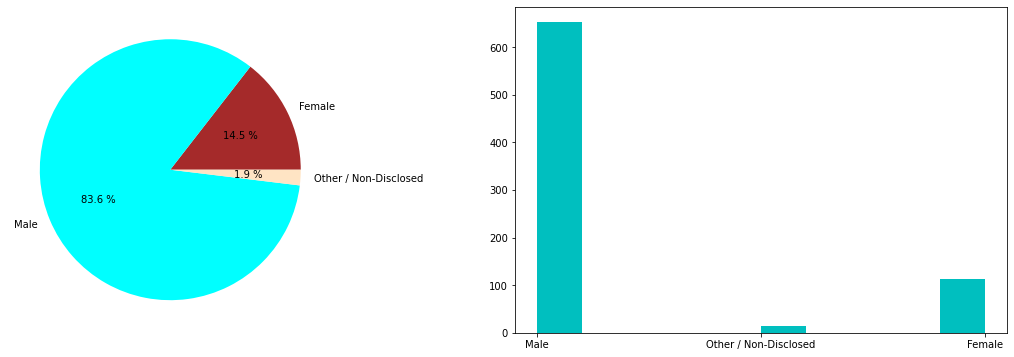

In [12]:
#4 DATOS DEMOGRAFICOS POR GENERO
Resumen=pd.DataFrame(np.unique(Datos["Genero"],return_counts=True))  #MAS FACIL, TE GENERA UN RESUMEN EN UN DATAFRAME DE CUANTOS CMPRAS FEMENINAS, CUANTAS MASCULINAS Y DE OTROS
Res=np.unique(Datos["Genero"],return_counts=True) #ES LO MISMO QUE LO ANTERIOR PERO EN UN ARREGLO MATRICIAL

plt.figure(figsize=(30,6))
plt.subplot(131)
plt.pie(Res[1],labels=Res[0], autopct="%0.1f %%",colors=["#A52A2A","#00FFFF","#FFE4C4"])
plt.subplot(132)
plt.hist(Datos["Genero"],color="c")
plt.show()


In [15]:
#4. ANALISIS DE COMPRA GENERO
A=Datos.groupby("Genero",dropna=False).agg(No_Persona=("Usuario","nunique"),Compras_Realizadas=("Genero","count"),Precio_Medio=("Precio","mean"),Valor_Total=("Precio","sum"))## Filtro por Genero
A["Valor_Medio_Persona"]=A["Valor_Total"]/A["No_Persona"] #Unique saca eliminnas datos repetidos, pero nunique cuenta cuantos se repitieron.
A

,No_Persona,Compras_Realizadas,Precio_Medio,Valor_Total,Valor_Medio_Persona
Genero,,,,,
Female,81,113,3.203009,361.94,4.468395
Male,484,652,3.017853,1967.64,4.065372
Other / Non-Disclosed,11,15,3.346000,50.19,4.562727


In [16]:
#5 ANÁLISIS POR RANGO DE EDAD
bins = [0, 9, 14, 19, 24, 29, 34, 39, 100]
names = ["Menor de 10 Años", "De 10 a 14 Años", "De 15 a 19 Años", "De 20 a 24 Años", "De 25 a 29 Años", "De 30 a 34 Años", "De 35 a 39 Años", "Mayores de 40 años"]
Datos2=Datos.copy()
Datos2["Edad"] = pd.cut(Datos2["Edad"], bins, labels = names) #De la copia de los datos cambiamos la edad por los rangos de edad para así poder realizar elfiltro por estos
Datos2.head(5)


,IDcompras,Usuario,Edad,Genero,ID,NombreArticulo,Precio
0,0,Lisim78,De 20 a 24 Años,Male,108.0,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,Mayores de 40 años,Male,143.0,Frenzied Scimitar,1.56
2,2,Ithergue48,De 20 a 24 Años,Male,92.0,Final Critic,4.88
3,3,Chamassasya86,De 20 a 24 Años,Male,100.0,Blindscythe,3.27
4,4,Iskosia90,De 20 a 24 Años,Male,131.0,Fury,1.44


In [18]:
AA=Datos2.groupby("Edad",dropna=False).agg(No_Persona=("Usuario","nunique"),Compras_Realizadas=("Genero","count"),Precio_Medio=("Precio","mean"),Valor_Total=("Precio","sum"))## Filtro por Edad rango cambiado
AA["Valor_Medio_Persona"]=AA["Valor_Total"]/AA["No_Persona"] #Unique saca eliminnas datos repetidos, pero nunique cuenta cuantos se repitieron.
AA

,No_Persona,Compras_Realizadas,Precio_Medio,Valor_Total,Valor_Medio_Persona
Edad,,,,,
Menor de 10 Años,17,23,3.353478,77.13,4.537059
De 10 a 14 Años,22,28,2.956429,82.78,3.762727
De 15 a 19 Años,107,136,3.035956,412.89,3.858785
De 20 a 24 Años,258,365,3.052219,1114.06,4.318062
De 25 a 29 Años,77,101,2.900990,293.00,3.805195
De 30 a 34 Años,52,73,2.931507,214.00,4.115385
De 35 a 39 Años,31,41,3.601707,147.67,4.763548
Mayores de 40 años,12,13,2.941538,38.24,3.186667


In [29]:
#6 Los 5 que más gastan
Arreglo=Datos.groupby("Usuario",dropna=False).agg(Recuento_Compras=("Usuario","count"),Precio_Medio=("Precio","mean"),Valor_Total=("Precio","sum"))## Filtro por usuarios la suma, elrecuento y el promedio
Des=Arreglo.sort_values("Valor_Total",ascending=False)#Arreglo de forma descendente
Gastones=Des.head(5) #Escojo los 5 Primeros
Gastones

,Recuento_Compras,Precio_Medio,Valor_Total
Usuario,,,
Lisosia93,5,3.792000,18.96
Idastidru52,4,3.862500,15.45
Chamjask73,3,4.610000,13.83
Iral74,4,3.405000,13.62
Iskadarya95,3,4.366667,13.10


In [31]:
#7 Los 5 Articulos populares

Arreglo2=Datos.groupby("ID",dropna=False).agg(Nombre_Articulo=("NombreArticulo","unique"),Numero_Compras=("ID","count"),Precio=("Precio","unique"),Valor_Total=("Precio","sum"))## Filtro por ID del articulo 
Des2=Arreglo2.sort_values("Numero_Compras",ascending=False)#Arreglode forma descendente
Populares=Des2.head(n=5) #Escojo los 5 Primeros
Populares

,Nombre_Articulo,Numero_Compras,Precio,Valor_Total
ID,,,,
178.0,"[Oathbreaker, Last Hope of the Breaking Storm]",12,[4.23],50.76
145.0,[Fiery Glass Crusader],9,[4.58],41.22
108.0,"[Extraction, Quickblade Of Trembling Hands]",9,[3.53],31.77
82.0,[Nirvana],9,[4.9],44.10
19.0,"[Pursuit, Cudgel of Necromancy]",8,[1.02],8.16


In [33]:
#8 Los 5 Articulos rentables

Des3=Arreglo2.sort_values("Valor_Total",ascending=False)#Arreglode forma descendente
Rentables=Des3.head(n=5) #Escojo los 5 Primeros
Rentables

,Nombre_Articulo,Numero_Compras,Precio,Valor_Total
ID,,,,
178.0,"[Oathbreaker, Last Hope of the Breaking Storm]",12,[4.23],50.76
82.0,[Nirvana],9,[4.9],44.10
145.0,[Fiery Glass Crusader],9,[4.58],41.22
92.0,[Final Critic],8,[4.88],39.04
103.0,[Singed Scalpel],8,[4.35],34.80


**RESUME DE LA INFORMACIÓN**

Se presenta una información de las compras de articulos realizadas directamene en el videojuego denominado Heroes of Pymoli y que se utilizarán para que los jugadores desarrollen de forma más personalizada dicho juego. A continuación, representaremos el resumen de toda la información que podemos inferir hacerca delarchivo analizado.
 

***Con respecto a las compras en general***

*   En total se realizaron 780 compras realizadas por 576 jugadores diferentes 
*   Existe gran variedad de articulos en el juego, para este casose vendieron 183 disitintos articulos.   
*   En promedio los artículos tuvieron un precio de USD 3,1
*   De los 180 articulos vendidos se obtuvieron unos ingresos de USD 2.379,8 


***Con respecto a las compras por genero***

|Genero|No\_Persona|Compras\_Realizadas|Precio\_Medio|Valor\_Total|Valor\_Medio_Persona|
|---|---|---|---|---|---|
|Female|81|113|3\.203008849557522|361\.94|4\.468395061728395|
|Male|484|652|3\.0178527607361967|1967\.64|4\.065371900826446|
|Other / Non-Disclosed|11|15|3\.3460000000000005|50\.190000000000005|4\.562727272727273|


De la tabla anterior podemos asegurar los siguiente:

*  De los 576 jugadores el 84,03% son hombre (484), el 14,06% son mujeres (81) y el restante 1,91%, es decir 11 jugadores manifiestan pertenecer a otro tipo de genero.
*  Los hombres realizaron más compras, en total 652 que equivalen a USD 1967,64; en promedio USD 3,017 por compra; por persona en promedio los hombres gastaron USD 4,065. Siguen las mujeres que realizaron  113 compras equivalente a USD 361,94; en promedio USD 3,203 por compra; por persona en promedio las mujeres gastaron más que los hombres (USD 4,468). Por último laspersonas que se identifican con otro tipo de orientaciónrealizaron 15 compras equivalentes a USD 50,19 con USD 3,346 en promedio por compra, es decir, gastaron más en cada compra. 

![Imagen 1. Compras por Genero](https://github.com/Neverurueta/Analisis_de_Datos/blob/main/Imagen%201.png?raw=true)


***Con respecto a las compras por rango de edad***

Se establecieron diferentes rangos de edad para analizar las compras realizadas, todos con una diferencia de 4 años. El resumen de los datos de comprqas asociados a estos intervalos de edades se encuentra en la siguiente tabla:

|Edad|No\_Persona|Compras\_Realizadas|Precio\_Medio|Valor\_Total|Valor\_Medio_Persona|
|---|---|---|---|---|---|
|Menor de 10 Años|17|23|3\.353478260869565|77\.13|4\.537058823529412|
|De 10 a 14 Años|22|28|2\.9564285714285714|82\.78|3\.7627272727272727|
|De 15 a 19 Años|107|136|3\.035955882352941|412\.89|3\.858785046728972|
|De 20 a 24 Años|258|365|3\.0522191780821917|1114\.06|4\.318062015503876|
|De 25 a 29 Años|77|101|2\.900990099009901|293\.0|3\.8051948051948052|
|De 30 a 34 Años|52|73|2\.9315068493150687|214\.0|4\.115384615384615|
|De 35 a 39 Años|31|41|3\.601707317073171|147\.67000000000002|4\.763548387096774|
|Mayores de 40 años|12|13|2\.9415384615384617|38\.24|3\.186666666666667|

De lo anterior podemos concluir:

*  Los competidores que más jugaban presentaban una edad comprendida entre 20 y 24 años (258 jugadores de 576) y los que menos jugaban eran los mayores de 40 años (12 jugadores de 576)
*  Quienes realizaron más compras fueron los jugadores que están entre 20 y 24 años y por un valor total de USD 1.114,06 ,  los mayores de 40 años realizaron la menor cantidad de compras, 23 en total con un valor total de USD 38,24. En promedio el costo mayor por una compra es de USD 3,6 y lo realizaron los jugadores cuyasedades estaban entre 35 y 39 años.


***Los más gatone***

Para identificar los 5 jugadores más compraron en el juego visualizamos la siguiente tabla:

|Usuario|Recuento\_Compras|Precio\_Medio|Valor\_Total|
|---|---|---|---|
|Lisosia93|5|3\.7920000000000003|18\.96|
|Idastidru52|4|3\.8625|15\.45|
|Chamjask73|3|4\.61|13\.83|
|Iral74|4|3\.4050000000000002|13\.620000000000001|
|Iskadarya95|3|4\.366666666666667|13\.100000000000001|

El jugador que más gastó es el denminado ***Lisosia93*** con un total de 5 compras realizadas que en fecto se reflejaron en un valor total de USD 18,96 com un promedio de USD 3,8 por cada compra.


***Articulo más comprado***

Para identificar los 5 articulos más vendidos  en el juego visualizamos la siguiente tabla:

|ID|Nombre\_Articulo|Numero\_Compras|Precio|Valor\_Total|
|---|---|---|---|---|
|178\.0|\['Oathbreaker, Last Hope of the Breaking Storm']|12|\[4.23]|50\.760000000000005|
|145\.0|\['Fiery Glass Crusader']|9|\[4.58]|41\.22|
|108\.0|\['Extraction, Quickblade Of Trembling Hands']|9|\[3.53]|31\.77|
|82\.0|\['Nirvana']|9|\[4.9]|44\.1|
|19\.0|\['Pursuit, Cudgel of Necromancy']|8|\[1.02]|8\.16|


***Articulo más rentable***
COn respecto a los articulos con mayor costo total de ventas resumimos los 5 primeros en la siguiente tabla:

|ID|Nombre\_Articulo|Numero\_Compras|Precio|Valor\_Total|
|---|---|---|---|---|
|178\.0|\['Oathbreaker, Last Hope of the Breaking Storm']|12|\[4.23]|50\.760000000000005|
|82\.0|\['Nirvana']|9|\[4.9]|44\.1|
|145\.0|\['Fiery Glass Crusader']|9|\[4.58]|41\.22|
|92\.0|\['Final Critic']|8|\[4.88]|39\.04|
|103\.0|\['Singed Scalpel']|8|\[4.35]|34\.8|


Comoes de esperar elarticulo más vendido concide con ser el más rentable y es el demominado ***Oathbreaker, Last Hope of the Breaking Storm***,con un total de 19 ventas que acumulan un valor total de USD 50,

